# Contents 

- Abstract 

- Introduction 

- Data Exploration 

- Dealing with imbalanced data methodology

- Data Pre-processing 

- Dimensionality reduction and Feature selection

- Model Selection 

- Conclusion 


# Abstract

This report provides a fully developed data mining solution realted to a potentially fatal illness that costs over 8,000 lives per year,  mainly in South America by a parasite known as Trypanosoma cruzi which is the  causative agent of Chagas disease.
The goal of this report is to  develop an efficient data mining pipeline to predict new, previously unknown epitopes  for this parasite.Four datasets were provided:it was divided in two sets,one to be used for model development, and  another one for validation. The training dataset contained 1189 features, exploratory data analysis revealed that 98.66% of the data belong to the negative class. In order to explicitly deal with the class imbalance within the data, it was addressed by exploring best evaluated sampling methods at the pre-processing phase.In addition, feature selection and dimensionality reduction approches were applied as a process of trimming down a large dataset,so that to identity the factors which largely effect target variable. The best model has been choosen based on MCC score and that model has been used to validate on holdout dataset.


# Introduction

The goal of this report is to present a fully developed data mining solution whilst showing the whole 
process of its development. Four datasets were provided and they were divided in two sets: "df_train" & "prots_train", for model development, and "df_holdout" and "prots_holdout" datasets for validation. The datasets are related to building prediction system for Linear B-cell epitope, which are commonly short protein fragments that are recognized by certain  components of the immune system, and their prediction is related to the wider application of data  mining in the field of bioinformatics.The problem at hand is to develop data mining pipeline to predict new, previously unknown epitopes 
for this parasite. This would be useful as prediction is an important step in the early exploration of potential candidates  for the development of diagnostic, preventive and therapeutic interventions against infectious  diseases.

## Data Exploration


Initial exploration of the training dataset revealed the following features: 

- There are 76740 labelled data records in total.

- There are 1189 input attributes

- There are no missing and duplicate values.

- The data set is imbalanced; of the total records 75709(98.66 %) are of negative class "-1" and
 1031 records (1.34 %) had the outcome postive class "+1".

- Viewing the correlation matrix using corr() haven't provided much insides as given data is huge.

## Dealing with imbalanced data methodology

For handling imbalance data this project has explored following approches and best one has be selected for further data pipeline.

1)Oversampling- 1)Reandom-Over-Sampling
                2)SMOTE

2)Undersampling-1)Near Miss
                2)Random-Under-sampling


# OverSampling

In oversampling, we increase the number of samples in minority class to match up to the number of samples of the majority class.

Mathematical example: Suppose we have following class distribution

1 label --------------> 900 data  points

0 label ---------------> 100 data points so+ 800 points need to add to 0 class

--------------------------------------------------------------

Then Data would be after Oversampling Implementation,

1 label ------>900 data points

0 label ------> 900 data points 

----------------------------------------------------------------
Oversampling Implementation can be done in two ways,

1)Near Miss Over sampling

2)RandomOverSampling method

3)SMOTETomek method

Firstly,we have to install imblearn library

# Random Undersampling

As the name suggests, random undersampling reduces the number of majority class randomly down to the desired ratio against the minority class. This is probably the easiest way to undersample and can actually yield good results if there are a lot of the majority class instances that are close to each other.

# Oversampling with SMOTE

SMOTE is one of the most popular oversampling techniques, Unlike random oversampling that only duplicates some random examples from the minority class, SMOTE generates examples based on the distance of each data by using Euclidean distance and the minority class nearest neighbors, so the generated examples are different from the original minority class. The process to generate the synthetic samples:

1)Choose random data from the minority class.

2)Calculate the Euclidean distance between the random data and its k nearest neighbors.

3)Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.

4)Repeat the procedure until the desired proportion of minority class is met.

This method is effective because the synthetic data that are generated are relatively close with the feature space on the minority class, thus adding new “information” on the data, unlike the original oversampling method.


## Data Pre-processing

As noted during data exploration as data was imbalanced,so to address this issue four diffrent sampling methods were implemented and the best performed one has been choosen for further pre-processing. In the under-sampling, Near-miss was first enforced but after evaluating the metrics(accuracy, confusion matrix,f1-score) it has been found, this method is underperforming and won't be the optimal method to build upon further data pipeline pre-processing. The second method tried out was Random-under sampling, the performace was on par with previous sampling method, after appling this method -1 class got reduced from  52982 to 736, hence it was evident of data loss with this approch. There were few pros and cons was found, such as drop data from the majority class randomly, Very fast training (data shrinks to 2x minority) but major issue with this method was it loses data, as a result this method wasn't considered for further pre-processing.So based on the above 2 methods of undersampling and there model evaluation results, we can conclude Undersampling approch is not efficent with given data.

As a result third approch Random-over-sampling has been used and to evaluate it's performce, random forest classifier and gradient boosting classifier has been used and this method has performed extremely better, with 86% of f1-score on random forest classifier and 48% f1-score on radient boosting classifier and there was't any trade-off between performance and data loss, therefore this approch has been seleted for further pre-processing.

# Dimensionality reduction and Feature selection

Dimensionality reduction was the second phase of pre-processing, as dimensionality reduction is the process of trimming down a large dataset,so that we could identity the factors which largely effect our target variable.And advantage with feature selction methods has shown, models tend to show a dip in accuracy when the number of variables is significantly higher than optimal and processing a model with large number of features is computationally expensive.

Two dimensionality reduction approaches were explored to build data pipeline.
1) as a 1st feature selection method BOURTA approch has been explored,as it is a random forest based method, it works for tree models like Random Forest but also valid with other classification models like SVM or Logistic regression. Boruta ineratively removes features that are statistically less relevant. It basically Create shadow features by randomley select features and shuffles values in columns
It was build on random forest classifier with n_estimators='auto' parameter tuning and it was fitted on random-over-sampling method processed data, so that the project could build effictive data pipeline. After modeling, the number of significant features were printed and BOURTA has helped to reduce features from 1189 to 441. So the next move was to use this new DataFrame(bourta_features) to train RandomForestClassifier model. Before that train-test split has executed once again by suppling new DataFrame(bourta_features) which are the optimal features for model development. Then these optimal features which are extraced from BOURTA were,trained on random forest classifier and gradient boosting classifier model to check it's efficiency on three parts with the help of matthews correlation coefficient 1)MCC_train 2)MCC_cv	3)MCC_test	

The Methodology of BOURTA followed for feature selection:

-Train Random Forest/XGBoost and calculate feature importance by mean decrease Gini impurity(this tells us the rank of the feature or contribution of the feature).

-Check if real features have higher importance compared to shadow features

-Repeat this for every iteration

-If original feature performed better, then mark it as important

Disadvantage with Boruta has been observed: Slow speed as compared to other feature selection algorithms.

2)As a 2nd dimensionality reduction method PCA has been excuted, by first calculating 95% variance or retain 95% of useful features and here also  random-over-sampled data has been provided, the idea behind using two approches was to observe which best approch would be to build classifer model on. The pca.explained_variance_ratio_ has provided the columns which are capturing most variation in data and that has provided useful information from given dataset to give us the pca.n_components  .
Here PCA has helped to reduce features from 1170 to 220. All these features are computed column. They are the new feature, so that now we can use this new DataFrame(x_pca) to train classifer model. Next agian once again train-test split is executed, with new DataFrame(x_pca),which are the optimal features given by PCA. Two classifer models were deployed to evaluate these new features performace, same as above methodology. The MCC results were as follows:- MCC_train ,MCC_cv	,MCC_test	


The following findings were observed with two explored feature reduction methods:

1)It helps in training model faster

2)Reduces the complexity of the model

3)makes it easier to interpret

4)Reducing over-fitting by selecting the optmial features

5)Improves the performance metric.


# Mathews correlation coefficient (mcc)

MCC takes all the cells of the Confusion Matrix into consideration in its formula.
MCC = TP * TN – FP * FN / √ (TP +FP) * (TP + FN) * (TN + FP) * (TN + FN)
Similar to Correlation Coefficient, the range of values of MCC lie between -1 to +1. A model with a score of +1 is a perfect model and -1 is a poor model.
It's a great metric for imbalanced datasets, as it considers all of the TP, TN, FP, FN. Whereas other equations from accuracy or sensitivity or sepecificity they're looking at the positive or negative classes or number of correct predictions versus the total but then for mcc, it considers all of the terms in the same equation and even if there's imbalanced dataset this metric is robust.

## Benchmark Models

A benchmark was created from the dataset for the random forest classifier, gradient boosting classifier and on our findings, we can say that F1 score and MCC is making more sense compared to Sensitivity and Specificity. The models were all left with their default settings and all test options were set to 10-fold cross-validation.

## Classification Models

After data pre-processing the models were revaluated and an improvement in accuracy could be seen 
for the----------  models. Accuracy for the------------models remained the same.

## Model Development

After data pre-processing, the models produced were further developed in an attempt to improve 
their performance. 


## Model selection 

The best model produced using matthews correlation coefficient.
The best MCC model was the-----model. 
Before predictions were made, the prediction dataset was pre-processed and made more there was no data leakage, so that model won't be getting overfitted.
After pre-processing the “holdout” dataset, were used to validate the best models on the performance of MCC score. 


## Conclusion

Critical evaluations, including noting the limitations of this work and providing ideas for possible 
improvements, have been noted throughout the report.
Working with this project gave me the opportunity to learn how to work with highly imbalanced data and how to approch and build reliable data pipeline by exploring various eda approaches, sampling methods and feature selection as well as reduction to
provide a full data mining solution to a “real-world” problem. 

It gave me a hands-on experience allowing me to study numerous data mining industry leading methods and techniques and the 
provided study material was supportive to understand principle concept and mathematics of data mining.
I Personally,found that one of the most challenging parts of this project was the BOURTA implementation phase: as it has without data compression with the help of groupby has averagely taken 7-10 hours(twice).
This project has shown me first-hand how to work with big-data and to build predicting system without letting data leakage.I've leanred how important it is too keep test & train set seprate, spliting should do done before approching pre-processing methods and how to avoid model overfitting.

If I were to repeat this report, there are a few things I might do differently. In hindsight, perhaps exploring data compression techniques in data mining as to train BOURTA on such huge features was not the best option, as lots of potentially useful (for prediction) time were lost. 

The feature reduced dataset models were initially getting overfit and random forest classifier has provided better accuracies most of the time. However, the best accuracy may not always be the best model. This is another thing that writing this report and coursework implementation has taught me, how much MCC score for perfoamce evaluation is useful and KFold validation for better resampling strategies for imbalanced datasets.
In the future, I would like to try and develop classifer models for imbalanced data through model hyper tuning instead of using the parameters of the  models.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# for Dimensionality reduction
from sklearn.decomposition import PCA

# for Feature selection
from sklearn.feature_selection import VarianceThreshold

# for creating pipeline 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


#for Models development 
from sklearn import model_selection
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

#for validation
from sklearn.model_selection import cross_val_score,KFold

#for model Evaluation 
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,matthews_corrcoef

#for categorical datatype
import scipy.stats as stats

import warnings
warnings.filterwarnings(action='ignore')

# Loading data

In [2]:
df_1=pd.read_csv('df_train.csv')
df_1

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,P23253.1:2,5693,P23253.1,24,Y,1378212,75914,"9606,9986",0,2,...,-6.534201,-23.461905,-2.026497,-10.976587,10.632502,1.899121,5.987014,22.757457,-6.143911,-1.136779
1,P23253.1:2,5693,P23253.1,25,S,1378212,75914,"9606,9986",0,2,...,-4.392078,-1.733373,7.224207,-2.539621,8.304244,-0.358899,5.584130,17.243431,-6.938871,-8.858502
2,P23253.1:2,5693,P23253.1,26,V,1378212,75914,"9606,9986",0,2,...,-7.734902,1.585801,-2.086515,3.191944,1.550936,5.611089,2.161179,9.840781,-2.644685,-10.233049
3,P23253.1:2,5693,P23253.1,27,D,1378212,75914,"9606,9986",0,2,...,-9.555528,0.306586,-2.501868,2.321484,2.366742,5.858835,2.451758,10.419416,-1.646064,-10.823489
4,P23253.1:2,5693,P23253.1,28,D,1378212,75914,"9606,9986",0,2,...,-7.413021,5.494316,5.306029,4.775133,-2.842552,-1.012134,-0.069497,19.691379,1.410738,-11.099221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76735,AAC47657.1:2,5693,AAC47657.1,422,E,1.56994e+07,149109,9606,1,0,...,-2.388749,4.902493,6.011090,15.984471,-3.131478,15.240655,-5.008885,-23.892627,-14.655092,-30.381730
76736,AAC47657.1:2,5693,AAC47657.1,423,P,1.56994e+07,149109,9606,1,0,...,2.759380,12.733624,11.665964,25.418130,-6.800666,15.801071,-3.574833,-23.082379,-13.408504,-9.167238
76737,AAC47657.1:2,5693,AAC47657.1,424,H,1.56994e+07,149109,9606,1,0,...,5.248336,10.937465,20.090941,24.080025,-8.321738,6.547436,-2.416444,-8.839442,-15.400362,-11.243904
76738,AAC47657.1:2,5693,AAC47657.1,425,V,1.56994e+07,149109,9606,1,0,...,9.423128,7.047310,28.195767,24.707281,-6.786525,3.525354,-2.688904,-16.044679,-14.681359,-10.264476


In [3]:
df_2=pd.read_csv('prots_train.csv')
df_2

,Info_taxid,Info_orgname,Info_length,Info_sequence,Info_protein_id,Info_DB,feat_global_Entropy,feat_global_MolWeight,feat_global_AAtypes_Tiny,feat_global_AAtypes_Small,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,5693,Trypanosoma cruzi,1162,MVAIADARYETSSENSLIDTVAKYSVDDGETWETQIAIKNSRVSSV...,P23253.1,NCBI protein,3.848152,140946.59,0.463855,0.714286,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
1,5693,Trypanosoma cruzi,445,MKALKLFKDRLCPFCQRVLITAKEKRVTLEEVEVPLGDDMPQWYKE...,ABM91076.1,NCBI protein,4.166689,58646.43,0.244944,0.471910,...,4.459569,-4.092658,0.841568,-0.874290,2.300038,5.186805,-2.865351,4.829588,0.070739,-3.585838
2,5693,Trypanosoma cruzi,68,RVAEAEKQRAAEATKVAEAEKQKAAEATKVAEAEKQRAAEATKVAE...,AAA30177.1,NCBI protein,2.445754,8414.97,0.411765,0.485294,...,-27.029848,32.953309,-17.420641,9.217372,-36.902862,32.173180,-11.351753,-29.097349,12.556550,-4.932169
3,5693,Trypanosoma cruzi,78,HMIMDAFKTLLGASVATEYEFDEFDGKNLRKAALEGNLGGGVADAA...,CAA44070.1,NCBI protein,3.484142,9375.73,0.410256,0.615385,...,-7.589393,5.573261,-10.120415,5.200450,-3.180617,15.323860,-2.494471,10.580764,1.751693,-1.584016
4,5693,Trypanosoma cruzi,879,MGRTVVGASRMFWLTHFVPLLLALCPSEPAHALAPGSSRVELFKRQ...,CAA40511.1,NCBI protein,4.051926,109755.58,0.391354,0.637088,...,-1.733629,-6.877600,2.391464,6.320755,7.355918,4.425117,-0.184576,0.867253,-4.911593,1.837728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,5693,Trypanosoma cruzi,267,MSKATHTHGLMKDPDLPVTPDGVTYHLNCKSDQLADRILLVGDPGR...,Q4DAD9,NCBI protein,4.131190,33718.05,0.322097,0.576779,...,1.834532,-1.617111,0.246619,2.118924,2.584515,6.116746,0.320292,3.080463,-5.374181,-2.164603
187,5693,Trypanosoma cruzi,379,MATFPELLRPLKLGRYTLRNRIIMAPLTRCQATEDDHVPRTESMLK...,Q8I6L9,NCBI protein,4.139139,49070.22,0.279683,0.496042,...,-0.825350,3.054223,-6.513789,-0.383596,2.389472,7.995508,-1.972915,0.734609,-0.104388,-2.316395
188,5693,Trypanosoma cruzi,1060,MGKTVVGASRMFWLMFFVPLLLALCPSEPAHALAPGSSRVELFKRQ...,BAA09334.1,NCBI protein,3.985605,129180.27,0.428302,0.679245,...,-5.922354,-14.656341,-0.268592,8.102096,8.991250,5.005244,-1.190551,2.088654,-5.739172,5.426870
189,5693,Trypanosoma cruzi,954,MHSRVAAVKAPRTHNRRCVTGSSGRRREGRESEPQRPHMSRHHFCS...,EAN82969.1,NCBI protein,4.065627,118803.73,0.374214,0.599581,...,-6.831326,-4.635451,-4.972592,-0.677105,3.634831,7.420005,1.168354,5.653622,0.040004,0.973467


## Combining dataframes
Pd.merge()
-for combining data on common columns
-most flexiable, but also complex of the methods 
-many-to-one and many-to-many joins are possible
-side-by-side merge

In [4]:
data=df_1.merge(df_2, on='Info_protein_id', how='left')
data

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,P23253.1:2,5693,P23253.1,24,Y,1378212,75914,"9606,9986",0,2,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
1,P23253.1:2,5693,P23253.1,25,S,1378212,75914,"9606,9986",0,2,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
2,P23253.1:2,5693,P23253.1,26,V,1378212,75914,"9606,9986",0,2,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
3,P23253.1:2,5693,P23253.1,27,D,1378212,75914,"9606,9986",0,2,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
4,P23253.1:2,5693,P23253.1,28,D,1378212,75914,"9606,9986",0,2,...,-5.950848,-17.232761,1.343763,10.591547,9.997221,4.221520,-1.663674,-1.999722,-9.752276,4.202027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76735,AAC47657.1:2,5693,AAC47657.1,422,E,1.56994e+07,149109,9606,1,0,...,2.249729,-0.755186,-4.785074,-1.672472,1.237589,9.834575,-0.091252,3.426712,-0.755371,-2.994680
76736,AAC47657.1:2,5693,AAC47657.1,423,P,1.56994e+07,149109,9606,1,0,...,2.249729,-0.755186,-4.785074,-1.672472,1.237589,9.834575,-0.091252,3.426712,-0.755371,-2.994680
76737,AAC47657.1:2,5693,AAC47657.1,424,H,1.56994e+07,149109,9606,1,0,...,2.249729,-0.755186,-4.785074,-1.672472,1.237589,9.834575,-0.091252,3.426712,-0.755371,-2.994680
76738,AAC47657.1:2,5693,AAC47657.1,425,V,1.56994e+07,149109,9606,1,0,...,2.249729,-0.755186,-4.785074,-1.672472,1.237589,9.834575,-0.091252,3.426712,-0.755371,-2.994680


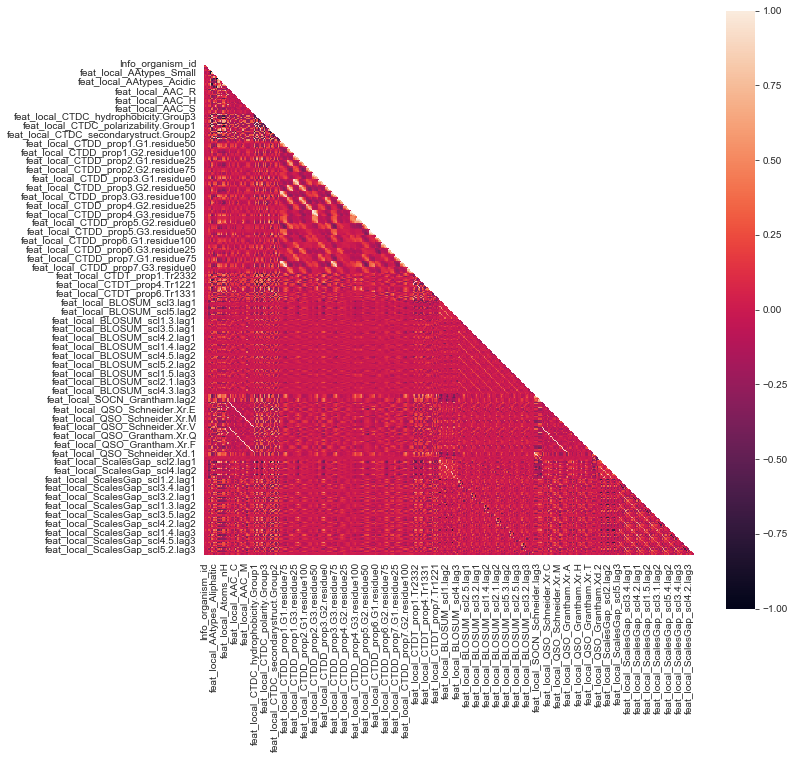

In [80]:
#Plotting a diagonal correlation matrix to better undestand as here too many features are present in data

# Compute the correlation matrix
corr=data.corr()

mask=np.zeros_like(corr)

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(11,11))
    ax=sns.heatmap(corr, mask=mask, vmax=1, square=True)

# Removing Info_ columns

In [5]:

Remove_info_cols = []
for i in data.columns:
    if 'Info_' in i:
        Remove_info_cols.append(i)
for i in Remove_info_cols:
    data = data.drop(i,axis=1)


# Selecting target feature

In [6]:
x=data.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=data['Class']

In [7]:
data.describe()

,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
count,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,...,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000
mean,-0.973130,2.953601,1896.737032,0.342893,0.557354,0.275763,0.069533,0.487478,0.512522,0.275338,...,-8.284763,-1.072546,-3.959354,0.922980,0.849021,9.028497,-1.457631,1.447005,0.049814,-0.900991
std,0.230258,0.391798,149.454915,0.162169,0.182368,0.148376,0.078651,0.178259,0.178259,0.155747,...,8.898745,8.043635,5.904858,3.369984,6.460886,4.747422,2.139314,6.574503,2.997488,2.543378
min,-1.000000,0.000000,1311.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.078643,-30.602793,-18.952132,-14.340430,-36.902862,-0.434247,-11.351753,-29.097349,-13.705875,-18.047676
25%,-1.000000,2.789898,1796.870000,0.200000,0.400000,0.200000,0.000000,0.400000,0.400000,0.200000,...,-16.059812,-5.501492,-6.893203,-0.987698,-0.538362,6.389090,-2.516774,-0.855313,-0.848554,-2.497117
50%,-1.000000,3.006239,1900.750000,0.333333,0.533333,0.266667,0.066667,0.466667,0.533333,0.266667,...,-6.602463,-1.051377,-3.429087,0.762435,1.927416,7.920793,-1.171253,2.395595,0.010082,-0.618414
75%,-1.000000,3.189898,2002.170000,0.466667,0.666667,0.333333,0.133333,0.600000,0.600000,0.400000,...,-0.512356,3.058782,-0.820412,2.698235,4.662820,10.497801,-0.338009,5.116489,1.546713,0.527906
max,1.000000,3.906891,2460.840000,1.000000,1.000000,1.000000,0.600000,1.000000,1.000000,1.000000,...,9.199977,32.953309,14.029740,13.670667,16.676993,32.173180,5.190063,21.093250,12.556550,8.814172


# Class distribution

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76740 entries, 0 to 76739
Columns: 1170 entries, feat_local_Entropy to feat_global_ScalesGap_scl5.4.lag3
dtypes: float64(1156), int64(14)
memory usage: 685.6 MB


In [9]:
class_count = y.value_counts()
class_count

-1    75709
 1     1031
Name: Class, dtype: int64

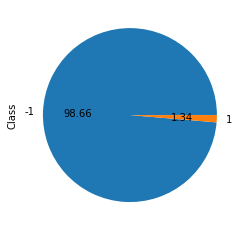

In [10]:
# Class distribution visualization in pie plot approch 1
y.value_counts().plot.pie(autopct='%.2f') # using pandas inbuild function for pieplot creation

In [11]:
class_count.index # gives us the labels of the 'Class' feature 

Int64Index([-1, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x26196abfb48>,
 [Text(-1.0990203524730262, 0.0464140587544918, '-1'),
  Text(1.0990203566828196, -0.04641395907233358, '1')],
 [Text(-0.5994656468034688, 0.02531675932063189, '98.66'),
  Text(0.5994656490997197, -0.025316704948545588, '1.34')])

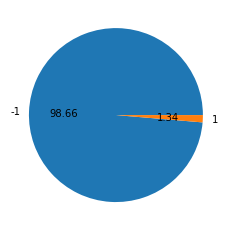

In [12]:
#Class distribution visualization approch 2 using matplotlib library 
import matplotlib.pyplot as plt
fig1, ax1 =plt.subplots()
ax1.pie(y.value_counts(),autopct='%.2f', labels=class_count.index) # %.2f give us the values in 2 digits

The above Class distribution visualization clearly manifest we are dealing with imbalanced data. 
So, we've to balance the data, because if we have imbalanced data, the model is more biased to the dominant target class and tends to predict the target as the predominant target class.

# Spliting data into training and testing sets

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time, that is if there is no random_state provided the system will 
# use a random_state that is generated internally. So, when you run the program multiple times you might see different 
# train/test data points and the behavior will be unpredictable

# Scalling

In [14]:
scaler= StandardScaler()
x_std =scaler.fit_transform(x)

In [15]:
#x_train.shape, y_train.shape, x_test.shape,y_test.shape
# so before splitting x=76740 ---->after splitting data would be split into 70%=53718 training and 30%=23022 for testing set.

((61392, 1170), (61392,), (15348, 1170), (15348,))

# sampling methods

In [ ]:
# using pip install imblearn
# So we’re going to use imbalance learn, which is an extension of the scikit-learn API that basically allows us to resample

# Near Miss under sample method

The number of classes before Near Miss undersampling Counter({-1: 75709, 1: 1031})
The number of classes after near Miss undersampling Counter({-1: 1031, 1: 1031})


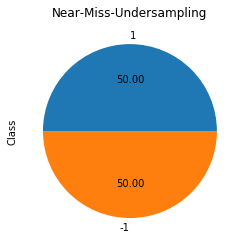

In [15]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss()
x_train_ns,y_train_ns=ns.fit_resample(x,y)

ax=y_train_ns.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Near-Miss-Undersampling")

print("The number of classes before Near Miss undersampling {}".format(Counter(y)))
print("The number of classes after near Miss undersampling {}".format(Counter(y_train_ns)))

In [26]:
y_train_ns.value_counts()

 1    824
-1    824
Name: Class, dtype: int64

In [16]:
# Near Miss method model 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [18]:
# Near Miss model evaluation
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(m(y_test,y_pred))

[[8378 6763]
 [   9  198]]
0.5587698722960647
              precision    recall  f1-score   support

          -1       1.00      0.55      0.71     15141
           1       0.03      0.96      0.06       207

    accuracy                           0.56     15348
   macro avg       0.51      0.75      0.38     15348
weighted avg       0.99      0.56      0.70     15348

0.11813237443944265


So this method clearly not useful for model development.

# Random Undersampling
Resample all classes but the minority class

The number of classes before undersampling Counter({-1: 60568, 1: 824})
The number of classes after undersampling Counter({-1: 824, 1: 824})


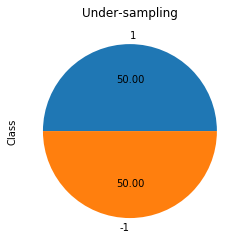

In [19]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

RUS= RandomUnderSampler(sampling_strategy=1) #Numerical value
x_train_RUS, y_train_RUS=RUS.fit_resample(x_train,y_train)

ax=y_train_RUS.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Under-sampling")

print("The number of classes before undersampling {}".format(Counter(y_train)))
print("The number of classes after undersampling {}".format(Counter(y_train_RUS)))

In [20]:
# Random under sampling method evaluation
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_RUS,y_train_RUS)

RandomForestClassifier()

In [22]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))

[[14532   609]
 [    1   206]]
0.9602554078707324
              precision    recall  f1-score   support

          -1       1.00      0.96      0.98     15141
           1       0.25      1.00      0.40       207

    accuracy                           0.96     15348
   macro avg       0.63      0.98      0.69     15348
weighted avg       0.99      0.96      0.97     15348

0.49123053687741847


In [23]:
#Class distribution
y_train_RUS.value_counts()

 1    824
-1    824
Name: Class, dtype: int64

So, with this method -1 class got reduced from  61392 to 824 , hence it is evident of data loss with this approch.

Drop data from the majority class randomly

Often untill balanced

Very fast training (data shrinks to 2x minority)

Loses data !

So based on the above 2 methods of undersampling and there model evaluation results, we can conclude Undersampling approch is not efficent with given data.

# Random Oversampling

The number of classes before oversampling Counter({-1: 60568, 1: 824})
The number of classes after oversampling Counter({-1: 60568, 1: 60568})


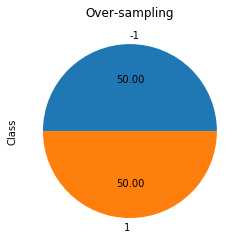

In [24]:
from imblearn.over_sampling import RandomOverSampler

#ROS= RandomOverSampler(sampling_strategy=1)
ROS= RandomOverSampler()
x_train_ROS, y_train_ROS=ROS.fit_resample(x_train,y_train)

ax=y_train_ROS.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Over-sampling")

print("The number of classes before oversampling {}".format(Counter(y_train)))
print("The number of classes after oversampling {}".format(Counter(y_train_ROS)))

In [25]:
#Class distribution
y_train_ROS.value_counts()


-1    60568
 1    60568
Name: Class, dtype: int64

In [53]:
type(x_train_ROS), type(y_train_ROS)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

So, with this method +1 class got incresed from  1031 to 60568.

In [26]:
# Random over sample method model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ROS,y_train_ROS)

RandomForestClassifier()

In [27]:
# Random over sample method model evaluation
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))

[[15113    28]
 [   29   178]]
0.9962861610633307
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     15141
           1       0.86      0.86      0.86       207

    accuracy                           1.00     15348
   macro avg       0.93      0.93      0.93     15348
weighted avg       1.00      1.00      1.00     15348

0.8601058297043539


So there based on above performance measures, over-sampling approch will to used for further data pipeline building.

# SMOTE Tomek


In [ ]:
# from imblearn.combine import SMOTETomek 
# smote_t=SMOTETomek()
# x_train_ST,y_train_ST=smote_t.fit_resample(x_train,y_train)

# ax=y_train_ROS.value_counts().plot.pie(autopct='%.2f')
# _=ax.set_title("Over-sampling")

# print("The number of classes before oversampling {}".format(Counter(y_train)))
# print("The number of classes after oversampling {}".format(Counter(y_train_ROS)))

In [ ]:
# # SMOTE Tomek method model
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier()
# classifier.fit(x_train_ROS,y_train_ROS)

In [ ]:
# # SMOTE Tomek method model evaluation
# y_pred=classifier.predict(x_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

# Dimensionality reduction

# 1) Recursive Feature Elimination (RFE)

In [37]:
from sklearn.feature_selection import RFE
feature_select=RFE(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1), n_features_to_select=0.95)
feature_select.fit(x_train_ROS,y_train_ROS)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
    n_features_to_select=0.95)

In [38]:
feature_select.get_support()

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
feature_select.ranking_ # 1 represent true and other than 1 is false

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
features=x_train_ROS.columns[feature_select.get_support()]
features

Index(['feat_local_Entropy', 'feat_local_MolWeight', 'feat_local_AAtypes_Tiny',
       'feat_local_AAtypes_Small', 'feat_local_AAtypes_Aliphatic',
       'feat_local_AAtypes_Aromatic', 'feat_local_AAtypes_NonPolar',
       'feat_local_AAtypes_Polar', 'feat_local_AAtypes_Charged',
       'feat_local_AAtypes_Basic',
       ...
       'feat_global_ScalesGap_scl2.1.lag3',
       'feat_global_ScalesGap_scl3.1.lag3',
       'feat_global_ScalesGap_scl4.1.lag3',
       'feat_global_ScalesGap_scl5.1.lag3',
       'feat_global_ScalesGap_scl3.2.lag3',
       'feat_global_ScalesGap_scl4.2.lag3',
       'feat_global_ScalesGap_scl5.2.lag3',
       'feat_global_ScalesGap_scl4.3.lag3',
       'feat_global_ScalesGap_scl5.3.lag3',
       'feat_global_ScalesGap_scl5.4.lag3'],
      dtype='object', length=1111)

In [44]:
feature_select.n_features_in_

1170

In [42]:
feature_select.n_features_

1111

So RFE has selected 1111 out of 1170 features for model development.

In [46]:
#call tranfrom() on x to filter it down to selected features
RFE_features=feature_select.transform(x_train_ROS) #apply feature selection

In [68]:
RFE_features.shape,x_train.shape, x_std.shape,  x.shape , y.shape, y_train.shape,y_train_ROS

((121136, 1111),
 (61392, 1170),
 (76740, 1170),
 (76740, 1170),
 (76740,),
 (61392,),
 0        -1
 1        -1
 2        -1
 3        -1
 4        -1
          ..
 121131    1
 121132    1
 121133    1
 121134    1
 121135    1
 Name: Class, Length: 121136, dtype: int64)

# Spliting data using RFE given optimal features 

In [71]:
x_train_RFE, x_test_RFE, y_train_RFE, y_test_RFE=train_test_split(RFE_features,y_train_ROS,test_size=0.20, random_state=42)

In [72]:
x_test_RFE.shape, y_test_RFE.shape, x_train_RFE.shape, y_train_RFE.shape

((24228, 1111), (24228,), (96908, 1111), (96908,))

# Training model with RFE optimal Features

1) RandomForestClassifier model

2) GradientBoostingClassifier model

In [76]:
#Training Random Forest Model with cross-validation and model evolution on MCC score

import datetime
start =datetime.datetime.now()

#Training Random Forest Model
model=RandomForestClassifier(random_state=42)
model.fit(x_train_RFE,y_train_RFE)
end =datetime.datetime.now()
print("Total execution time:  ", end-start)

#Training cross-validation model
from sklearn.metrics import make_scorer,recall_score,matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv=RandomForestClassifier(random_state=42)
cv_scoring ={'MCC': make_scorer(matthews_corrcoef)}
cv= cross_validate(model_cv, x_train_RFE, y_train_RFE, cv=5, scoring=cv_scoring)

#Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred=model.predict(x_train_RFE)
y_test_pred=model.predict(x_test_RFE)


mcc_train=matthews_corrcoef(y_train_RFE,y_train_pred)
mcc_test=matthews_corrcoef(y_test_RFE,y_test_pred)
mcc_cv=cv['test_MCC'].mean()

#Display model performance results
df_labels =pd.Series(['MCC_train','MCC_cv','MCC_test'],name='Performance_metric_names')
df_values =pd.Series([mcc_train, mcc_cv, mcc_test],name='Performance_metric_values')
df_RFE= pd.concat([df_labels, df_values], axis=1)
df_RFE

Total execution time:   0:01:55.143345


,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999154
1,MCC_cv,0.997753
2,MCC_test,0.998680


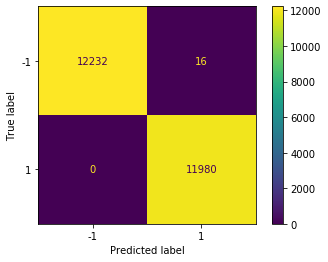

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_RFE, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [77]:
#Training Gradient Bosting lassifier Model with cross-validation and model evalution on MCC score

import datetime
start =datetime.datetime.now()

#Training Gradient Boosting Classifier Model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train_RFE,y_train_RFE)
end =datetime.datetime.now()
print("Total execution time:  ", end-start)

#Training cross-validation model
from sklearn.metrics import make_scorer,recall_score,matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
cv_scoring ={'MCC': make_scorer(matthews_corrcoef)}
cv= cross_validate(model_cv, x_train_RFE, y_train_RFE, cv=5, scoring=cv_scoring)

#Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred=model.predict(x_train_RFE)
y_test_pred=model.predict(x_test_RFE)


mcc_train=matthews_corrcoef(y_train_RFE,y_train_pred)
mcc_test=matthews_corrcoef(y_test_RFE,y_test_pred)
mcc_cv=cv['test_MCC'].mean()

#Display model performance results
df_labels =pd.Series(['MCC_train','MCC_cv','MCC_test'],name='Performance_metric_names')
df_values =pd.Series([mcc_train, mcc_cv, mcc_test],name='Performance_metric_values')
df_RFE_GB= pd.concat([df_labels, df_values], axis=1)
df_RFE_GB

Total execution time:   0:07:23.141239


,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999154
1,MCC_cv,0.968996
2,MCC_test,0.998680


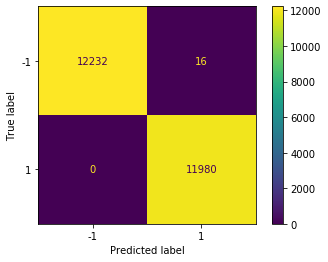

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_RFE, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

After evaluting RFE model on RandomForestClassifier model and GradientBoostingClassifier model,as we can see there is not any parameter to distinguish both models,as there is no dip or jump in both models performance can be seen above visualization as well as MCC score. Hence RandomForestClassifier model will be selected for "holdout dataset" as it was fast compared to GradientBoostingClassifier model.

# 2) BORUTA Method

I tried this approch but due to how slow BORUTA is (avg 7-10 hours to fit boruta model) and beacuse of that my pc has got freezed couple of time, due to that i've to shutdown pc and I've to rerun this whole process, as a result of that I could not able to use BORUTA method for feature selection. I've able to successfully run whole 100 Iterations but there was data leckage in pre-processing phase so, BORUTA model got overfitted, after fixing data leckage problem, model next few run I could not able to finish 100 Interations.All the below results were from one successful execution (100 Iterations).

In [33]:
# one important thing to consider while working with Boruta is that it works on NumPy arrays only
#Converting scaled data to numpy array before fitting it on the Bourta selector
# pip install boruta

x_train_ROS=x_train_ROS.to_numpy()

In [34]:
y_train_ROS=y_train_ROS.to_numpy()

In [ ]:
from boruta import BorutaPy
model=RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5) #For Boruta

#define Boruta feature selection method
feat_selector=BorutaPy(model,n_estimators='auto', verbose=2,random_state=1)

#Find all relevant features
feat_selector.fit((x_train_ROS),(y_train_ROS))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1170
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1103
Tentative: 	67
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	1103
Tentative: 	67
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	1103
Tentative: 	67
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	1103
Tentative: 	67
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	1135
Tentative: 	35
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	1135
Tentative: 	35
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	1135
Tentative: 	35
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	1135
Tentative: 	35
Rejected: 	0
Iteration: 	16 / 100
Confi

In [61]:
#check selected features
feat_selector.support_

array([ True,  True,  True, ...,  True,  True, False])

In [62]:
#check ranking of features
print(feat_selector.ranking_) # 1 represent true and other than 1 is false

[  1   1   1 ...   1   1 128]


In [63]:
print("Number of significant features:", feat_selector.n_features_)

Number of significant features: 441


So Boruta has selected 441 features for model development.

In [65]:
# Creating optimal features using BorutaPy object (feat_selector)to transform the features in the data

In [76]:
#call tranfrom() on x to filter it down to selected features
bourta_features=feat_selector.transform(x_train_std) #apply feature selection

In [77]:
bourta_features.shape

(76740, 441)

BOURTA has helps me to reduce features from 1170 to 441.
So that now we can use this new DataFrame(bourta_features) to train classifier model. 
Next I would do train-test split once again, but this time I wll supply new DataFrame(bourta_features).

# Spliting data using BOURTA given optimal features 

In [79]:
x_train_bourta, x_test_bourta, y_train, y_test=train_test_split(bourta_features,y,test_size=0.20, random_state=42)


In [81]:
x_test_bourta.shape, y_test.shape

((15348, 441), (15348,))

In [82]:
x_train_bourta.shape, y_train.shape

((61392, 441), (61392,))

# Training model with BOURTA optimal Features

In [84]:
import datetime
start =datetime.datetime.now()

#Training Random Forest Model
model=RandomForestClassifier(random_state=42)
model.fit(x_train_bourta,y_train)
end =datetime.datetime.now()
print("Total execution time:  ", end-start)

#Training cross-validation model
from sklearn.metrics import make_scorer,recall_score,matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv=RandomForestClassifier(random_state=42)
cv_scoring ={'MCC': make_scorer(matthews_corrcoef)}
cv= cross_validate(model_cv, x_train_bourta, y_train, cv=5, scoring=cv_scoring)

#Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred=model.predict(x_train_bourta)
y_test_pred=model.predict(x_test_bourta)


mcc_train=matthews_corrcoef(y_train,y_train_pred)
mcc_test=matthews_corrcoef(y_test,y_test_pred)
mcc_cv=cv['test_MCC'].mean()

#Display model performance results
df_labels =pd.Series(['MCC_train','MCC_cv','MCC_test'],name='Performance_metric_names')
df_values =pd.Series([mcc_train, mcc_cv, mcc_test],name='Performance_metric_values')
df_bourta= pd.concat([df_labels, df_values], axis=1)
df_bourta

Total execution time:   0:01:19.626033


,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_cv,0.979669
2,MCC_test,0.987731


# 3) PCA Method

In [84]:
# we want the explained variance to be between 95–99%
#95% of variance

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95) #This will tell PCA, retain 95% of useful features 

pca = PCA().fit(x_train_ROS)
x_pca=pca.fit_transform(x_train_ROS) # PCA on random-over-sampling object

x_pca.shape

(121136, 1170)

In [85]:
#Following will tell,which columns are capturing how many % of variation that would be useful information from given dataset.
pca.explained_variance_ratio_ 

array([9.98805861e-01, 8.56197176e-04, 3.25003227e-04, ...,
       9.40475809e-33, 9.40475809e-33, 9.40475809e-33])

In [88]:
# Following wil tell, how many components we got, which is bascially given data columns(features)
pca.n_components_

1170

Here PCA has selcted 1170 features . All these  features are computed column. They are the new feature, so that now we can use this new DataFrame(x_pca) to train my model. Next I would do train-test split once again, but this time I wll supply new DataFrame(x_pca).

In [87]:

# #Training Random Forest Model with cross validation 
# from sklearn.model_selection import cross_val_score
# model_3=KNeighborsClassifier(n_neighbors=5)
# print(cross_val_score(model_3, x_train_pca, y_train, cv=10, scoring='accuracy'))


[0.99967427 0.99983713 0.99951132 0.99951132 0.99967421 0.99983711
 0.99934843 0.99983711 1.         0.99951132]


In [89]:
x_pca.shape,y_train_ROS.shape

((121136, 1170), (121136,))

# Spliting data using PCA given optimal features 

In [143]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca=train_test_split(x_pca,y_train_ROS,test_size=0.20, random_state=42)
x_train_pca.shape , x_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((96908, 1170), (24228, 1170), (96908,), (24228,))

In [92]:
#Training Random Forest Model
model_PCA=RandomForestClassifier(random_state=42)
model_PCA.fit(x_train_pca,y_train_pca)

# y_train_pred=model_2.predict(x_train_pca)
# y_test_pred=model_2.predict(x_test_pca)
y_pred_pca=model_PCA.predict(x_test_pca)

print(matthews_corrcoef(y_test_pca,y_pred_pca))
print(confusion_matrix(y_test_pca,y_pred_pca))
print(accuracy_score(y_test_pca,y_pred_pca))
print(classification_report(y_test_pca,y_pred_pca))

0.9984326303872045
[[12229    19]
 [    0 11980]]
0.9992157833911177
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     12248
           1       1.00      1.00      1.00     11980

    accuracy                           1.00     24228
   macro avg       1.00      1.00      1.00     24228
weighted avg       1.00      1.00      1.00     24228



In [144]:
#Training Random Forest Model with cross-validation and model evolution on MCC score

import datetime
start =datetime.datetime.now()

#Training Random Forest Model
model_rfc=RandomForestClassifier(random_state=42)
model_rfc.fit(x_train_pca,y_train_pca)
end =datetime.datetime.now()
print("Total execution time:  ", end-start)

#Training cross-validation model
from sklearn.metrics import make_scorer,recall_score,matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv=RandomForestClassifier(random_state=42)
cv_scoring ={'MCC': make_scorer(matthews_corrcoef)}
cv= cross_validate(model_cv, x_train_pca, y_train_pca, cv=5, scoring=cv_scoring)

#Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred=model_rfc.predict(x_train_pca)
y_test_pred=model_rfc.predict(x_test_pca)


mcc_train=matthews_corrcoef(y_train_pca,y_train_pred)
mcc_test=matthews_corrcoef(y_test_pca,y_test_pred)
mcc_cv=cv['test_MCC'].mean()

#Display model performance results
df_labels =pd.Series(['MCC_train','MCC_cv','MCC_test'],name='Performance_metric_names')
df_values =pd.Series([mcc_train, mcc_cv, mcc_test],name='Performance_metric_values')
df_pca= pd.concat([df_labels, df_values], axis=1)
df_pca

Total execution time:   0:04:31.646112


,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999154
1,MCC_cv,0.997733
2,MCC_test,0.998433


This RandomForestClassifier model will be used for holdout dataset validation that was build through following above data pipeline.

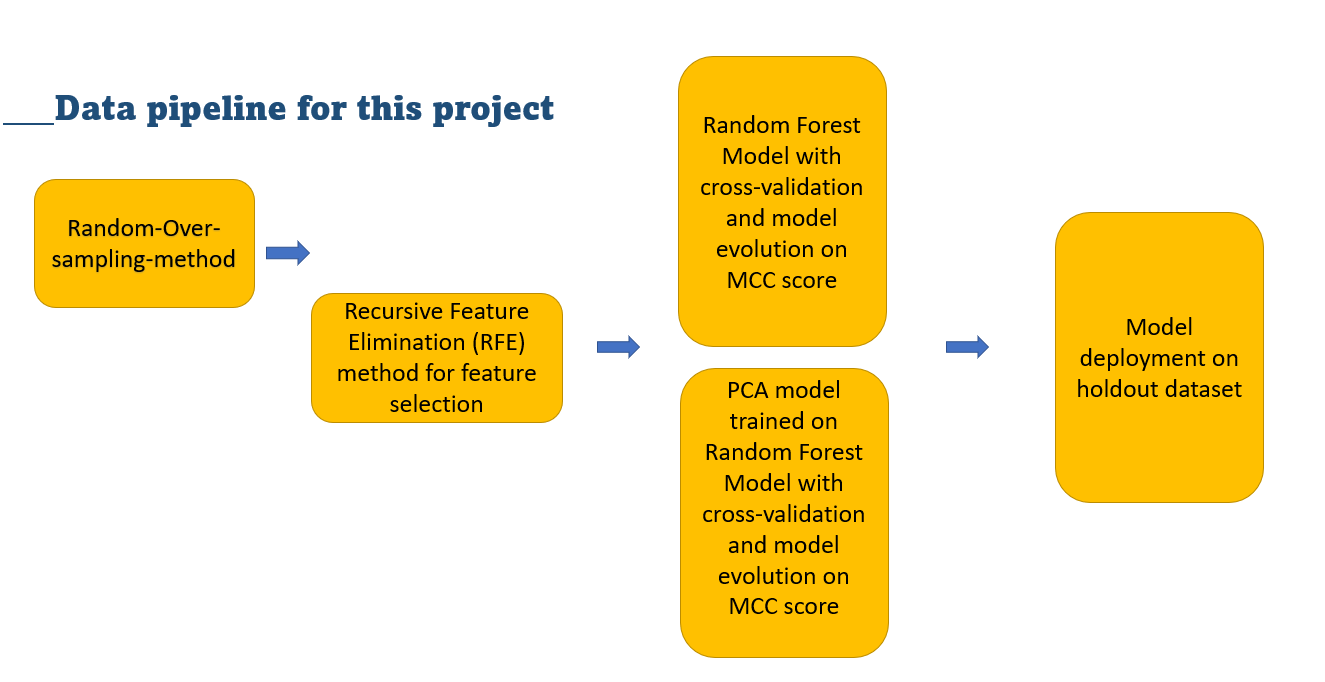

# Model Development

In [ ]:
# models={
#     "Logistic Regression"                  :LogisticRegression(),
#     "Random Forest"                        :RandomForestClassifier(),
#     "Decision Tree"                        :DecisionTreeClassifier(),
#     "K-Nearest Neighbors"                  :KNeighborsClassifier(),
#     "Gradient Boosting"                    :GradientBoostingClassifier()
    
# }

# for name, model in models.items():
#     model.fit(x_train,y_train)
#     print(name+ " Trained")

# Loading holdout dataset

In [94]:
df_3=pd.read_csv("df_holdout.csv")
df_3

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,EAN87014.1:1,5693,EAN87014.1,1,M,11298135,41158,9606,0,1,...,-4.549094,10.212623,24.889555,-8.141488,2.648292,7.236000,1.899302,10.442917,-10.245384,-1.101085
1,EAN87014.1:1,5693,EAN87014.1,2,A,11298135,41158,9606,0,1,...,-7.982280,16.508058,23.589776,-2.984973,-0.528107,9.714819,0.773754,14.709717,-12.379972,-0.935527
2,EAN87014.1:1,5693,EAN87014.1,3,T,11298135,41158,9606,0,1,...,-4.009095,11.838805,26.953382,-4.866418,-0.370650,9.601392,0.837201,11.795860,-10.750096,-5.336032
3,EAN87014.1:1,5693,EAN87014.1,4,T,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,0.213810,7.961824,31.299999,-5.170461,2.175602,6.076406,0.494105,11.670982,-7.979119,-4.995618
4,EAN87014.1:1,5693,EAN87014.1,5,L,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,5.427120,17.556689,33.671912,1.716937,2.606437,4.843954,1.367897,11.934643,-7.631075,2.901006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,AAC47720.1:2,5693,AAC47720.1,555,R,2.98962e+07,70091,10000067,2,0,...,19.490005,-24.470667,-27.722282,4.410659,4.267216,7.622234,1.085596,-6.350201,1.682633,2.062462
115116,AAC47720.1:2,5693,AAC47720.1,556,F,2.98962e+07,70091,10000067,2,0,...,11.253855,-13.726349,-30.885573,6.225646,2.862018,9.714138,0.613732,-0.712953,0.986394,1.605931
115117,AAC47720.1:2,5693,AAC47720.1,557,T,2.98962e+07,70091,10000067,2,0,...,13.117884,-7.920183,-15.111873,8.616273,2.059419,7.234419,0.299683,3.678106,1.286302,1.486408
115118,AAC47720.1:2,5693,AAC47720.1,558,L,2.98962e+07,70091,10000067,2,0,...,17.003892,-1.422266,-12.721278,12.975264,0.252933,7.471802,-1.365325,-0.107333,0.408510,2.378515


In [95]:
df_3.drop_duplicates()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,EAN87014.1:1,5693,EAN87014.1,1,M,11298135,41158,9606,0,1,...,-4.549094,10.212623,24.889555,-8.141488,2.648292,7.236000,1.899302,10.442917,-10.245384,-1.101085
1,EAN87014.1:1,5693,EAN87014.1,2,A,11298135,41158,9606,0,1,...,-7.982280,16.508058,23.589776,-2.984973,-0.528107,9.714819,0.773754,14.709717,-12.379972,-0.935527
2,EAN87014.1:1,5693,EAN87014.1,3,T,11298135,41158,9606,0,1,...,-4.009095,11.838805,26.953382,-4.866418,-0.370650,9.601392,0.837201,11.795860,-10.750096,-5.336032
3,EAN87014.1:1,5693,EAN87014.1,4,T,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,0.213810,7.961824,31.299999,-5.170461,2.175602,6.076406,0.494105,11.670982,-7.979119,-4.995618
4,EAN87014.1:1,5693,EAN87014.1,5,L,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,5.427120,17.556689,33.671912,1.716937,2.606437,4.843954,1.367897,11.934643,-7.631075,2.901006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,AAC47720.1:2,5693,AAC47720.1,555,R,2.98962e+07,70091,10000067,2,0,...,19.490005,-24.470667,-27.722282,4.410659,4.267216,7.622234,1.085596,-6.350201,1.682633,2.062462
115116,AAC47720.1:2,5693,AAC47720.1,556,F,2.98962e+07,70091,10000067,2,0,...,11.253855,-13.726349,-30.885573,6.225646,2.862018,9.714138,0.613732,-0.712953,0.986394,1.605931
115117,AAC47720.1:2,5693,AAC47720.1,557,T,2.98962e+07,70091,10000067,2,0,...,13.117884,-7.920183,-15.111873,8.616273,2.059419,7.234419,0.299683,3.678106,1.286302,1.486408
115118,AAC47720.1:2,5693,AAC47720.1,558,L,2.98962e+07,70091,10000067,2,0,...,17.003892,-1.422266,-12.721278,12.975264,0.252933,7.471802,-1.365325,-0.107333,0.408510,2.378515


In [96]:
df_3.describe().columns

Index(['Info_organism_id', 'Info_pos', 'Info_cluster', 'feat_local_Entropy',
       'feat_local_MolWeight', 'feat_local_AAtypes_Tiny',
       'feat_local_AAtypes_Small', 'feat_local_AAtypes_Aliphatic',
       'feat_local_AAtypes_Aromatic', 'feat_local_AAtypes_NonPolar',
       ...
       'feat_local_ScalesGap_scl2.1.lag3', 'feat_local_ScalesGap_scl3.1.lag3',
       'feat_local_ScalesGap_scl4.1.lag3', 'feat_local_ScalesGap_scl5.1.lag3',
       'feat_local_ScalesGap_scl3.2.lag3', 'feat_local_ScalesGap_scl4.2.lag3',
       'feat_local_ScalesGap_scl5.2.lag3', 'feat_local_ScalesGap_scl4.3.lag3',
       'feat_local_ScalesGap_scl5.3.lag3', 'feat_local_ScalesGap_scl5.4.lag3'],
      dtype='object', length=388)

In [97]:
df_4=pd.read_csv("prots_holdout.csv")
df_4

,Info_taxid,Info_orgname,Info_length,Info_sequence,Info_protein_id,Info_DB,feat_global_Entropy,feat_global_MolWeight,feat_global_AAtypes_Tiny,feat_global_AAtypes_Small,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,5693,Trypanosoma cruzi,91,MATTLEEFSAKLDRLDAEFAKKMEEQNKKFFADKPDESTLSPEMKE...,EAN87014.1,NCBI protein,3.681485,12504.57,0.186813,0.307692,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,5693,Trypanosoma cruzi,92,MATTLEEFSAKLDRLDAEFAKKMEEQNKKFFADKPDESTLSPEMKE...,Q9U6Z1.2,NCBI protein,3.669314,12650.76,0.184783,0.304348,...,-11.544758,19.573937,-2.746095,11.662338,-22.003579,11.328160,-9.455573,-4.525271,6.930350,-5.521142
2,5693,Trypanosoma cruzi,227,PPPFGQAAAGDKPSPFGQAAAGDKPPPFGQAAAGDKPSPFGQAAAG...,AAP88022.1,NCBI protein,2.895197,25650.89,0.444934,0.726872,...,-21.082766,0.660302,-51.427235,-6.827018,5.849703,21.015658,-5.524052,15.601795,3.324447,3.098402
3,5693,Trypanosoma cruzi,796,GQQHWTFANSATHAGCTNPIILEWEAGKIIMITSCESDRRRVYEST...,AAC98688.2,NCBI protein,3.944805,98304.39,0.374372,0.605528,...,-13.478644,3.631585,-12.036293,8.241056,1.419643,12.518463,-5.530971,-2.949223,-4.965325,-11.201573
4,5693,Trypanosoma cruzi,107,MKYLAAYALVGLSGGTPSKSAVEAVLKAAGVPVDSSRVDALFAEFA...,CAA52943.1,NCBI protein,3.506076,12321.03,0.495327,0.710280,...,-5.028635,1.541698,-22.379079,4.924015,5.225606,20.502482,-2.106183,13.408103,-1.599686,-6.026202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,353153,Trypanosoma cruzi strain CL Brener,310,MAMMMTGRVLLVCALCVLWCGAAVAVSAADVSVGGDGSAGEYLLLQ...,XP_811244.1,NCBI protein,3.851228,38554.29,0.361290,0.587097,...,-17.701509,1.039197,-7.923228,1.099096,-3.151726,12.150248,-0.891699,0.631447,-3.065018,-0.700239
294,353153,Trypanosoma cruzi strain CL Brener,406,MMTGRVLLVCALCVLWCGAGGVYARDILKNAQGGCVASGGFGKKRS...,XP_818473.1,NCBI protein,3.863106,48385.49,0.435961,0.667488,...,-15.940676,-13.524797,-9.420090,2.283176,10.393085,7.991776,-0.427370,12.502979,1.246690,1.255909
295,5693,Trypanosoma cruzi,307,MSHCCNPHGSPVLVGVFGGSGVYQLHNLNEVKYYAIETPFGRPSGD...,Q4DQ97,NCBI protein,4.129985,38636.16,0.345277,0.566775,...,2.539538,4.654020,7.671556,-0.019567,1.372835,5.294127,-0.337362,-0.462313,1.422828,-1.795417
296,5693,Trypanosoma cruzi,340,MSLRLCVCTATANGEYYMSMFNKHLSSFFKTITLGSTVDDFKQDKD...,Q4DAE1,NCBI protein,4.123830,44616.72,0.273529,0.491176,...,0.728591,0.926865,2.358578,1.680692,0.507020,7.004849,-0.363247,-1.917253,1.402875,-0.134205


In [98]:
df_4.drop_duplicates()

,Info_taxid,Info_orgname,Info_length,Info_sequence,Info_protein_id,Info_DB,feat_global_Entropy,feat_global_MolWeight,feat_global_AAtypes_Tiny,feat_global_AAtypes_Small,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,5693,Trypanosoma cruzi,91,MATTLEEFSAKLDRLDAEFAKKMEEQNKKFFADKPDESTLSPEMKE...,EAN87014.1,NCBI protein,3.681485,12504.57,0.186813,0.307692,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,5693,Trypanosoma cruzi,92,MATTLEEFSAKLDRLDAEFAKKMEEQNKKFFADKPDESTLSPEMKE...,Q9U6Z1.2,NCBI protein,3.669314,12650.76,0.184783,0.304348,...,-11.544758,19.573937,-2.746095,11.662338,-22.003579,11.328160,-9.455573,-4.525271,6.930350,-5.521142
2,5693,Trypanosoma cruzi,227,PPPFGQAAAGDKPSPFGQAAAGDKPPPFGQAAAGDKPSPFGQAAAG...,AAP88022.1,NCBI protein,2.895197,25650.89,0.444934,0.726872,...,-21.082766,0.660302,-51.427235,-6.827018,5.849703,21.015658,-5.524052,15.601795,3.324447,3.098402
3,5693,Trypanosoma cruzi,796,GQQHWTFANSATHAGCTNPIILEWEAGKIIMITSCESDRRRVYEST...,AAC98688.2,NCBI protein,3.944805,98304.39,0.374372,0.605528,...,-13.478644,3.631585,-12.036293,8.241056,1.419643,12.518463,-5.530971,-2.949223,-4.965325,-11.201573
4,5693,Trypanosoma cruzi,107,MKYLAAYALVGLSGGTPSKSAVEAVLKAAGVPVDSSRVDALFAEFA...,CAA52943.1,NCBI protein,3.506076,12321.03,0.495327,0.710280,...,-5.028635,1.541698,-22.379079,4.924015,5.225606,20.502482,-2.106183,13.408103,-1.599686,-6.026202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,353153,Trypanosoma cruzi strain CL Brener,310,MAMMMTGRVLLVCALCVLWCGAAVAVSAADVSVGGDGSAGEYLLLQ...,XP_811244.1,NCBI protein,3.851228,38554.29,0.361290,0.587097,...,-17.701509,1.039197,-7.923228,1.099096,-3.151726,12.150248,-0.891699,0.631447,-3.065018,-0.700239
294,353153,Trypanosoma cruzi strain CL Brener,406,MMTGRVLLVCALCVLWCGAGGVYARDILKNAQGGCVASGGFGKKRS...,XP_818473.1,NCBI protein,3.863106,48385.49,0.435961,0.667488,...,-15.940676,-13.524797,-9.420090,2.283176,10.393085,7.991776,-0.427370,12.502979,1.246690,1.255909
295,5693,Trypanosoma cruzi,307,MSHCCNPHGSPVLVGVFGGSGVYQLHNLNEVKYYAIETPFGRPSGD...,Q4DQ97,NCBI protein,4.129985,38636.16,0.345277,0.566775,...,2.539538,4.654020,7.671556,-0.019567,1.372835,5.294127,-0.337362,-0.462313,1.422828,-1.795417
296,5693,Trypanosoma cruzi,340,MSLRLCVCTATANGEYYMSMFNKHLSSFFKTITLGSTVDDFKQDKD...,Q4DAE1,NCBI protein,4.123830,44616.72,0.273529,0.491176,...,0.728591,0.926865,2.358578,1.680692,0.507020,7.004849,-0.363247,-1.917253,1.402875,-0.134205


In [119]:
data_holdout=df_3.merge(df_4, on="Info_protein_id", how='left')
data_holdout.drop_duplicates()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,EAN87014.1:1,5693,EAN87014.1,1,M,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,EAN87014.1:1,5693,EAN87014.1,2,A,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
2,EAN87014.1:1,5693,EAN87014.1,3,T,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
3,EAN87014.1:1,5693,EAN87014.1,4,T,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
4,EAN87014.1:1,5693,EAN87014.1,5,L,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,AAC47720.1:2,5693,AAC47720.1,555,R,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115116,AAC47720.1:2,5693,AAC47720.1,556,F,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115117,AAC47720.1:2,5693,AAC47720.1,557,T,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115118,AAC47720.1:2,5693,AAC47720.1,558,L,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582


In [120]:
info_pep = data_holdout['Info_PepID']
info_pos = data_holdout['Info_pos']
info_pep = data_holdout['Info_PepID']

In [121]:
data_holdout.describe().columns

Index(['Info_organism_id', 'Info_pos', 'Info_cluster', 'feat_local_Entropy',
       'feat_local_MolWeight', 'feat_local_AAtypes_Tiny',
       'feat_local_AAtypes_Small', 'feat_local_AAtypes_Aliphatic',
       'feat_local_AAtypes_Aromatic', 'feat_local_AAtypes_NonPolar',
       ...
       'feat_global_ScalesGap_scl2.1.lag3',
       'feat_global_ScalesGap_scl3.1.lag3',
       'feat_global_ScalesGap_scl4.1.lag3',
       'feat_global_ScalesGap_scl5.1.lag3',
       'feat_global_ScalesGap_scl3.2.lag3',
       'feat_global_ScalesGap_scl4.2.lag3',
       'feat_global_ScalesGap_scl5.2.lag3',
       'feat_global_ScalesGap_scl4.3.lag3',
       'feat_global_ScalesGap_scl5.3.lag3',
       'feat_global_ScalesGap_scl5.4.lag3'],
      dtype='object', length=1175)

In [136]:
data_holdout.dropna(how='any',inplace=True)
data_holdout.isnull().sum()

Info_PepID                           0
Info_organism_id                     0
Info_protein_id                      0
Info_pos                             0
Info_AA                              0
                                    ..
feat_global_ScalesGap_scl4.2.lag3    0
feat_global_ScalesGap_scl5.2.lag3    0
feat_global_ScalesGap_scl4.3.lag3    0
feat_global_ScalesGap_scl5.3.lag3    0
feat_global_ScalesGap_scl5.4.lag3    0
Length: 1188, dtype: int64

In [137]:
data_holdout

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,EAN87014.1:1,5693,EAN87014.1,1,M,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,EAN87014.1:1,5693,EAN87014.1,2,A,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
2,EAN87014.1:1,5693,EAN87014.1,3,T,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
3,EAN87014.1:1,5693,EAN87014.1,4,T,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
4,EAN87014.1:1,5693,EAN87014.1,5,L,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,AAC47720.1:2,5693,AAC47720.1,555,R,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115116,AAC47720.1:2,5693,AAC47720.1,556,F,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115117,AAC47720.1:2,5693,AAC47720.1,557,T,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115118,AAC47720.1:2,5693,AAC47720.1,558,L,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582


In [138]:
df_master=data_holdout.copy()

In [139]:
df_master

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,EAN87014.1:1,5693,EAN87014.1,1,M,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,EAN87014.1:1,5693,EAN87014.1,2,A,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
2,EAN87014.1:1,5693,EAN87014.1,3,T,11298135,41158,9606,0,1,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
3,EAN87014.1:1,5693,EAN87014.1,4,T,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
4,EAN87014.1:1,5693,EAN87014.1,5,L,"11298135,22687575","41158,64769","9606,10000206","0,5","1,0",...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,AAC47720.1:2,5693,AAC47720.1,555,R,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115116,AAC47720.1:2,5693,AAC47720.1,556,F,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115117,AAC47720.1:2,5693,AAC47720.1,557,T,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115118,AAC47720.1:2,5693,AAC47720.1,558,L,2.98962e+07,70091,10000067,2,0,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582


In [140]:
Remove_info_cols = []
for i in df_master.columns:
    if 'Info_' in i:
        Remove_info_cols.append(i)
for i in Remove_info_cols:
    df_master= df_master.drop(i,axis=1)

In [141]:
df_master

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,...,feat_global_ScalesGap_scl2.1.lag3,feat_global_ScalesGap_scl3.1.lag3,feat_global_ScalesGap_scl4.1.lag3,feat_global_ScalesGap_scl5.1.lag3,feat_global_ScalesGap_scl3.2.lag3,feat_global_ScalesGap_scl4.2.lag3,feat_global_ScalesGap_scl5.2.lag3,feat_global_ScalesGap_scl4.3.lag3,feat_global_ScalesGap_scl5.3.lag3,feat_global_ScalesGap_scl5.4.lag3
0,2.440224,1985.11,0.400000,0.400000,0.266667,0.133333,0.466667,0.533333,0.266667,0.000000,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
1,2.573557,1925.01,0.466667,0.466667,0.266667,0.066667,0.400000,0.600000,0.266667,0.000000,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
2,2.606239,1866.97,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.000000,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
3,2.789898,1866.03,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.066667,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
4,2.789898,1866.03,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.066667,...,-11.902536,19.914597,-3.074344,11.670937,-22.382273,11.780122,-9.428168,-4.953871,6.851744,-5.560665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,3.323231,2034.24,0.266667,0.533333,0.333333,0.266667,0.533333,0.466667,0.133333,0.133333,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115116,3.139572,2007.21,0.333333,0.600000,0.333333,0.266667,0.533333,0.466667,0.133333,0.133333,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115117,3.139572,1957.19,0.333333,0.600000,0.400000,0.200000,0.533333,0.466667,0.133333,0.133333,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582
115118,3.006239,2007.26,0.266667,0.533333,0.400000,0.266667,0.533333,0.466667,0.200000,0.200000,...,-2.488531,6.163652,1.834153,-3.486605,0.747392,6.249441,2.737412,1.149577,-1.519955,-1.304582


In [145]:
# data_merge=data_holdout.merge(df_4 ,on='Info_protein_id',how='left')


# data_merge=data_merge.drop(['Info_pubmed_id'],axis=1)

# data_merge.drop_duplicates()

In [146]:
# df_master=data_merge.copy()

# df_master.describe()
# df_final=df_master.copy()
# df_final

In [147]:
Traget=model_rfc.predict(df_master)

In [148]:
Class=pd.Series(Traget)

In [149]:
df=pd.concat([info_pep,info_pos,Class],axis=1, keys=['Info_PepID','Info_pos','Class'])
df

,Info_PepID,Info_pos,Class
0,EAN87014.1:1,1,-1.0
1,EAN87014.1:1,2,-1.0
2,EAN87014.1:1,3,-1.0
3,EAN87014.1:1,4,-1.0
4,EAN87014.1:1,5,-1.0
...,...,...,...
115115,AAC47720.1:2,555,NaN
115116,AAC47720.1:2,556,NaN
115117,AAC47720.1:2,557,NaN
115118,AAC47720.1:2,558,NaN


In [150]:
df.isnull().sum()

Info_PepID         0
Info_pos           0
Class         113922
dtype: int64

In [154]:
df.describe()

,Info_pos,Class
count,115120.000000,1198.0
mean,343.618346,-1.0
std,380.157938,0.0
min,1.000000,-1.0
25%,115.000000,-1.0
50%,235.000000,-1.0
75%,409.000000,-1.0
max,3543.000000,-1.0


In [151]:
#Converting DataFrame into CSV file
df.to_csv("200282187.csv" , sep='\t')

In [152]:
df_5=pd.read_csv("200282187.csv" ,sep='\t')
df_5

,Unnamed: 0,Info_PepID,Info_pos,Class
0,0,EAN87014.1:1,1,-1.0
1,1,EAN87014.1:1,2,-1.0
2,2,EAN87014.1:1,3,-1.0
3,3,EAN87014.1:1,4,-1.0
4,4,EAN87014.1:1,5,-1.0
...,...,...,...,...
115115,115115,AAC47720.1:2,555,NaN
115116,115116,AAC47720.1:2,556,NaN
115117,115117,AAC47720.1:2,557,NaN
115118,115118,AAC47720.1:2,558,NaN
